In [110]:
import numpy as np #importing numpy python packages
import pandas as pd #importing pandas python packages
import matplotlib.pyplot as plt #importing matplotlib.pyplot for graphical representation
import seaborn as sns #importing seanborn 
from bokeh.palettes import magma #importing magma from boken.palettes
from bokeh.plotting import figure, output_file, show #importing figure, output file, show in boken plotting
from sklearn.metrics import confusion_matrix #importing confusion matrix from sklearns.metrics
from sklearn.neural_network import MLPClassifier #importing MLPClassifier from sklearn.neural_network
from sklearn.ensemble import RandomForestClassifier #importing RandomForestClassifier from sklearn.emsemble
from sklearn.neighbors import KNeighborsClassifier #importing KNeighbours Classifier from sklearn.neighbors
from sklearn.svm import SVC #importing SVC from sklearn.svm
from sklearn.metrics import precision_score #impporting precision score from sklearn.metrics
from sklearn.metrics import recall_score #importing recall score from sklearn.metrics
from sklearn.metrics import accuracy_score #importing accuracy score from sklearn.metrics
from sklearn.model_selection import train_test_split #importing train_test_spit from sklearn.model_selection


In [111]:
df= pd.read_csv('BCdata.csv') #code for importing breast cancer dataset

In [148]:
df #showing of the dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [113]:
df.isnull().any() #code for checking of null values

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [114]:
df.head(5) #code for showing first 5 columns

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [115]:
df=df.drop(columns='id', axis=1) #code for dropping "id" columns from dataset

In [116]:
df=df.drop(columns= 'Unnamed: 32', axis=1) #code for dropping "Unnamed:32" columns from dataset

In [117]:
df.head() #code for showing the some first columns of the dataset 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [118]:
df[['diagnosis']] = df[['diagnosis']].apply(lambda col:pd.Categorical(col).codes) #code for tranferring string column into integer

In [119]:
df.head() #showing some first coloumns after transformation 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


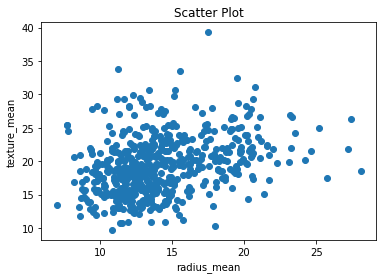

In [120]:
plt.scatter(df['radius_mean'], df['texture_mean']) #code for creation of scatter plot for data visualization
plt.title("Scatter Plot") #providing the name of the plot
plt.xlabel('radius_mean') #selecting the name of the x-axis
plt.ylabel('texture_mean') #selecting the name of the y-axis
plt.show() #visualization of the scatterplot


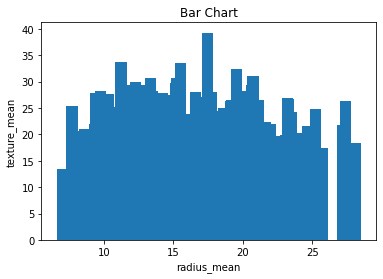

In [121]:
plt.bar(df['radius_mean'], df['texture_mean']) #code for generating bar plot for data visualization
plt.title("Bar Chart") #code for providing the name of the graph
plt.xlabel('radius_mean') #CODE FOR PROVIDING THE NAME OF X-AXIS
plt.ylabel('texture_mean') #code for providing the name of y-axis
plt.show() #code for showing the bar plot in data visualization


In [122]:
graph = figure(title = "Bokeh Scatter Graph") #code for creating boken scatterplot in data visualization 

In [149]:
color = magma(256) #selecting of colurs
graph.scatter(df['radius_mean'], df['texture_mean'], color=color) #creation of scatter plot
show(graph) #showing of the graph

In [124]:
graph = figure(title = "Bokeh line Chart") #code for generating boken line plot in data visualization
df1 = df['radius_mean'].value_counts() #code for selecting value counts
graph.line(df1, df['radius_mean']) #code for gaining the line graph
show(graph) #showing of the graph


In [125]:
df.columns #code for showing all columns in dataset

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [126]:
mean_features=list(df.columns[1:11]) #code for list in mean_features
se_features=list(df.columns[11:21]) #code for list in se_features
worst_features=list(df.columns[21:31]) #code for list in worst_features

In [127]:
mean_features.append('diagnosis') #performing append operation 
se_features.append('diagnosis') #performing append operation
worst_features.append('diagnosis') #performing append operation

In [128]:
corr=df[mean_features].corr() #code for performing corr in mean_features

In [129]:
corr #showing the value of corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,-0.012838


In [130]:
corr=df[se_features].corr() #performing corr inse_features

In [131]:
corr #ouput of corr

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,diagnosis
radius_se,1.000000,0.213247,0.972794,0.951830,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.567134
texture_se,0.213247,1.000000,0.223171,0.111567,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,-0.008303
perimeter_se,0.972794,0.223171,1.000000,0.937655,0.151075,0.416322,0.362482,0.556264,0.266487,0.244143,0.556141
area_se,0.951830,0.111567,0.937655,1.000000,0.075150,0.284840,0.270895,0.415730,0.134109,0.127071,0.548236
smoothness_se,0.164514,0.397243,0.151075,0.075150,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,-0.067016
compactness_se,0.356065,0.231700,0.416322,0.284840,0.336696,1.000000,0.801268,0.744083,0.394713,0.803269,0.292999
concavity_se,0.332358,0.194998,0.362482,0.270895,0.268685,0.801268,1.000000,0.771804,0.309429,0.727372,0.253730
concave points_se,0.513346,0.230283,0.556264,0.415730,0.328429,0.744083,0.771804,1.000000,0.312780,0.611044,0.408042
symmetry_se,0.240567,0.411621,0.266487,0.134109,0.413506,0.394713,0.309429,0.312780,1.000000,0.369078,-0.006522
fractal_dimension_se,0.227754,0.279723,0.244143,0.127071,0.427374,0.803269,0.727372,0.611044,0.369078,1.000000,0.077972


In [136]:
corr=df[worst_features].corr() #performing corr in worst_featurs

In [137]:
corr #showing of corr

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_worst,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492,0.776454
texture_worst,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122,0.456903
perimeter_worst,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957,0.782914
area_worst,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647,0.733825
smoothness_worst,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624,0.421465
compactness_worst,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455,0.590998
concavity_worst,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511,0.659610
concave points_worst,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,0.793566
symmetry_worst,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848,0.416294
fractal_dimension_worst,0.093492,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000,0.323872


In [138]:
prediction_vars= ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 
                              'radius_se', 'area_se', 'radius_worst', 'perimeter_worst', 
                             'compactness_worst'] #Selecting of prediction varience

In [139]:
train, test = train_test_split(df, test_size=0.15, random_state=1)#spilliting of dataset in train and test

In [140]:
train_x= train[prediction_vars] #code for train_x 
train_y= train['diagnosis'] #code for train_y
test_x= test[prediction_vars] #code for test_x
test_y= test['diagnosis'] #code for test_y

In [141]:
model = RandomForestClassifier() #defining of random classifier

In [142]:
model.fit(train_x, train_y) #fiting of the model

RandomForestClassifier()

In [143]:
predictions=model.predict(test_x) #performing prediction score

In [144]:
test_y #showing the test_y score

421    0
47     1
292    0
186    1
414    1
      ..
335    1
308    0
370    1
403    0
120    0
Name: diagnosis, Length: 86, dtype: int8

In [145]:

confusion_matrix(test_y, predictions)#performing confusion score

array([[51,  1],
       [ 5, 29]], dtype=int64)

In [146]:
precision=precision_score(test_y, predictions) #performing presicion score
print("The precision is %.2f" % precision) #showing precision score
recall=recall_score(test_y, predictions) #perforimg recall score
print("The recall is %.2f" % recall)#printing of recall score

The precision is 0.97
The recall is 0.85


In [147]:
accuracy = accuracy_score(test_y, predictions) #performing the accuracy
print("The Accuracy is %.2f" % accuracy) #pring of the accuracy score

The Accuracy is 0.93
